<img src="img/encabezado_EDA.png" alt="encabezado" width="1000" height="600"/>

# PASO 1: importación de librerías necesarias

In [1]:
import ast
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# PASO 2: limpieza y tratamiento de datos

In [2]:
# Convertimos las bases de datos a dataframes
df_goodreads = pd.read_csv("./data/goodreads_data.csv")
df_books = pd.read_csv("./data/books_of_the_decade.csv")

In [3]:
# Vemos la información del primer dataframe
df_goodreads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   10000 non-null  int64  
 1   Book         10000 non-null  object 
 2   Author       10000 non-null  object 
 3   Description  9923 non-null   object 
 4   Genres       10000 non-null  object 
 5   Avg_Rating   10000 non-null  float64
 6   Num_Ratings  10000 non-null  object 
 7   URL          10000 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 625.1+ KB


De esta primera lectura observamos que la columna "Description", que es la que presenta nulos, podemos borrarla ya que no aporta ninguna información necesaria a futuro.
Del mismo modo podemos eliminar la columna URL.

In [4]:
df_goodreads = df_goodreads.drop(columns=['Description','URL'])
df_goodreads.head()

,Unnamed: 0,Book,Author,Genres,Avg_Rating,Num_Ratings
0,0,To Kill a Mockingbird,Harper Lee,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,"5,691,311"
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,"9,278,135"
2,2,Pride and Prejudice,Jane Austen,"['Classics', 'Fiction', 'Romance', 'Historical...",4.28,"3,944,155"
3,3,The Diary of a Young Girl,Anne Frank,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,"3,488,438"
4,4,Animal Farm,George Orwell,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,"3,575,172"


En cuanto a la columna Num_Ratings debería ser de tipo int y no object, por lo que debemos realizar el cambio.

In [5]:
df_goodreads['Num_Ratings']

0       5,691,311
1       9,278,135
2       3,944,155
3       3,488,438
4       3,575,172
          ...    
9995          276
9996           60
9997          383
9998          263
9999           36
Name: Num_Ratings, Length: 10000, dtype: object

In [6]:
# Quitamos las comas y las sustituimos por nada:
df_goodreads['Num_Ratings'] = df_goodreads['Num_Ratings'].str.replace(',', '')

# Cambiamos el tipo a int.
df_goodreads['Num_Ratings'] = df_goodreads['Num_Ratings'].astype(int)

In [7]:
df_goodreads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   10000 non-null  int64  
 1   Book         10000 non-null  object 
 2   Author       10000 non-null  object 
 3   Genres       10000 non-null  object 
 4   Avg_Rating   10000 non-null  float64
 5   Num_Ratings  10000 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 468.9+ KB


La columna "Genres" está formada por una lista de distintos tipos de género.
Vamos a suponer que el género principal es el primero que aparece y lo indicaremos en una nueva columna.

In [8]:
def obtener_primer_valor(x):
    try:
        lista = ast.literal_eval(x)  # Convertir la cadena a lista
        if len(lista) > 0:  # Verificar si la lista no está vacía
            return lista[0]  # Devolver el primer valor
        else:
            return None  # Si la lista está vacía, devolver None (o cualquier valor por defecto)
    except (ValueError, SyntaxError):  # Capturar errores de conversión de cadenas no válidas
        return None  # Si la cadena no es válida, devolver None

# Aplicar la función a la columna
df_goodreads['Principal_Genre'] = df_goodreads['Genres'].apply(obtener_primer_valor)


In [9]:
df_goodreads.head(10)

,Unnamed: 0,Book,Author,Genres,Avg_Rating,Num_Ratings,Principal_Genre
0,0,To Kill a Mockingbird,Harper Lee,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,5691311,Classics
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,9278135,Fantasy
2,2,Pride and Prejudice,Jane Austen,"['Classics', 'Fiction', 'Romance', 'Historical...",4.28,3944155,Classics
3,3,The Diary of a Young Girl,Anne Frank,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,3488438,Classics
4,4,Animal Farm,George Orwell,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,3575172,Classics
5,5,The Little Prince,Antoine de Saint-Exupéry,"['Classics', 'Fiction', 'Fantasy', 'Childrens'...",4.32,1924063,Classics
6,6,1984,George Orwell,"['Classics', 'Fiction', 'Science Fiction', 'Dy...",4.19,4201429,Classics
7,7,The Great Gatsby,F. Scott Fitzgerald,"['Classics', 'Fiction', 'School', 'Historical ...",3.93,4839642,Classics
8,8,The Catcher in the Rye,J.D. Salinger,"['Classics', 'Fiction', 'Young Adult', 'Litera...",3.81,3315881,Classics
9,9,The Lord of the Rings,J.R.R. Tolkien,"['Fantasy', 'Classics', 'Fiction', 'Adventure'...",4.52,644766,Fantasy


In [10]:
# Observamos cuáles son los valores de la nueva columna
df_goodreads['Principal_Genre'].value_counts()

Principal_Genre
Fiction               1711
Nonfiction             957
Fantasy                942
Classics               515
Historical Fiction     467
                      ... 
Fae                      1
Womens                   1
Military History         1
Wicca                    1
Civil War                1
Name: count, Length: 207, dtype: int64

Existe géneros que seguramente se puedan agrupar en otros, por ejemplo Military History o Civil War podrían ser libros de género Histórico o Fae podría ser fantasía.

In [11]:
# Observamos que libros son:
generos_filtrados = 'Fae', 'Womens', 'Military History', 'Wicca', 'Civil War'
df_goodreads[df_goodreads['Principal_Genre'].isin(generos_filtrados)]

,Unnamed: 0,Book,Author,Genres,Avg_Rating,Num_Ratings,Principal_Genre
9587,9587,Night of the Fae (Ana Martin #1),Lyneal Jenkins,"['Fae', 'Paranormal', 'Romance', 'Urban Fantas...",3.73,174,Fae
9666,9666,Roots and Shadows,Shashi Deshpande,['Womens'],3.26,139,Womens
9683,9683,Passchendaele: The Anatomy of a Tragedy,Andrew Macdonald,"['Military History', 'History']",4.00,16,Military History
9858,9858,Wicca: A Guide for the Solitary Practitioner,Scott Cunningham,"['Wicca', 'Nonfiction', 'Witchcraft', 'Spiritu...",4.02,18913,Wicca
9947,9947,What They Did There: Profiles from the Battle ...,Steve Hedgpeth,"['Civil War', 'History', 'Military Fiction', '...",3.97,178,Civil War


In [12]:
df_goodreads['Principal_Genre'] = df_goodreads['Principal_Genre'].replace({'Civil War': 'History', 'Military History': 'History'})

In [13]:
df_goodreads['Principal_Genre'].value_counts()

Principal_Genre
Fiction               1711
Nonfiction             957
Fantasy                942
Classics               515
Historical Fiction     467
                      ... 
Cultural                 1
Fae                      1
Horses                   1
Womens                   1
Wicca                    1
Name: count, Length: 205, dtype: int64

In [14]:
# Como sigue habiendo muchos géneros con un solo valor vamos a analizar cuáles son para poder limpiarlo lo máximo posible

# Obtener los valores con un recuento de 1
generos = df_goodreads['Principal_Genre'].value_counts()
generos_unicos = generos[generos == 1]

# Ver los valores con recuento 1
generos_unicos

Principal_Genre
Fairy Tales             1
Social Justice          1
Survival                1
Personal Development    1
Communication           1
                       ..
Cultural                1
Fae                     1
Horses                  1
Womens                  1
Wicca                   1
Name: count, Length: 75, dtype: int64

In [15]:
generos_filtrados = 'Survival', 'Social Justice', 'Personal Development', 'High School', 'Magical Realism', 'Canada', 'Cooking', 'Horses'
df_goodreads[df_goodreads['Principal_Genre'].isin(generos_filtrados)]

,Unnamed: 0,Book,Author,Genres,Avg_Rating,Num_Ratings,Principal_Genre
570,570,Lies My Teacher Told Me: Everything Your Ameri...,James W. Loewen,"['Social Justice', 'History', 'Race', 'Audiobo...",3.97,66778,Social Justice
611,611,Walks Away Woman,Ki Longfellow,"['Survival', 'Adventure', 'Fiction', 'Novels',...",4.37,1143,Survival
805,805,"Take Command: Find Your Inner Strength, Build ...",Joe Hart,"['Personal Development', 'Self Help', 'Nonfict...",4.27,4498,Personal Development
2471,2471,Magic America,C.E. Medford,"['Magical Realism', 'Fantasy', 'Fiction', 'You...",3.82,356,Magical Realism
3529,3529,Being the Bad Boy's Victim,Claire Monette,"['High School', 'Contemporary', 'Romance', 'Sc...",3.79,319,High School
9353,9353,The Town That Drowned,Riel Nason,"['Canada', 'Young Adult', 'Historical Fiction'...",3.81,764,Canada
9455,9455,Tastes and Tales from Russia,Alla Danishevsky,"['Cooking', 'Food', 'Cookbooks']",4.50,12,Cooking
9610,9610,Casual Lies-A Triple Crown Adventure,Shelley Lee Riley,"['Horses', 'Animals', 'Nonfiction']",4.47,32,Horses


In [16]:
reemplazar = {'Social Justice': 'History','Survival': 'Adventure', 'Personal Development': 'Self Help',
              'High School': 'Romance', 'Canada': 'Historical Fiction', 'Comedy' : 'Humor','Judaism' : 'Religion',
               'Horses': 'Animals', 'Linguistics' : 'Linguistics', 'Transgender' : 'Memoir', 'Linguistics' : 'Philosophy',
             'Juvenile': 'Young Adult', 'Kids' : 'Childrens', 'Gaming' : 'Business', 'Suspense': 'Thriller', 'Light Novel' : 'Manga',
             'Architecture': 'Design', 'Shapeshifters' : 'Paranormal', 'comunication': 'Psychology', 'Gender': 'Feminism',
             'Pulp': 'Amazon', 'Marathi':'Mythology', 'Adult': 'New Adult', 'Anthropology': 'Essays', 'Ukrainian Literature': 'Classics',
             'Literary Criticism': 'Literature', 'Medicine': 'Medical', 'Portugal': 'Short Stories', 'Geology': 'Science' }

df_goodreads['Principal_Genre'] = df_goodreads['Principal_Genre'].replace(reemplazar)

In [17]:
df_goodreads['Principal_Genre'] = df_goodreads['Principal_Genre'].replace(
    to_replace=r'.*(Love|Romance|Teen).*',  # Expresión regular para encontrar "love","romance", etc
    value='Romance',                   # Nuevo valor
    regex=True                         # Usar regex
)


df_goodreads['Principal_Genre'] = df_goodreads['Principal_Genre'].replace(
    to_replace=r'.*(Literary Fiction|Cyberpunk|Speculative Fiction|Womens Fiction|Russia|German Literature|African American|Indian Literature|Indian Literature ).*',  # Expresión regular para encontrar "love" o "romance"
    value='Fiction',                   # Nuevo valor
    regex=True                         # Usar regex
)


df_goodreads['Principal_Genre'] = df_goodreads['Principal_Genre'].replace(
    to_replace=r'.*(Magical Realism|Gods|Angels|Fae|Fairy Tales|Epic Fantasy|Lds).*',  
    value='Fantasy',                   # Nuevo valor
    regex=True                         # Usar regex
)

df_goodreads['Principal_Genre'] = df_goodreads['Principal_Genre'].replace(
    to_replace=r'.*(Cooking|Vegetarian).*', 
    value='Food',                   # Nuevo valor
    regex=True                         # Usar regex
)

df_goodreads['Principal_Genre'] = df_goodreads['Principal_Genre'].replace(
    to_replace=r'.*(Christian Non Fiction|Non Fiction|Race|Death|Film|Law|Martial Arts|Prayer).*', 
    value='Nonfiction',                   # Nuevo valor
    regex=True                         # Usar regex
)

In [18]:
generos = df_goodreads['Principal_Genre'].value_counts()
generos_unicos = generos[generos == 1]

# Ver los valores con recuento 1
generos_unicos.index

Index(['Communication', 'Gothic', 'Banned Books', 'Mathematics', 'Egypt',
       'Magic', 'Media Tie In', 'Abuse', 'Sustainability', 'Biography Memoir',
       'Amish', 'Adoption', 'Cultural', 'Womens', 'Wicca'],
      dtype='object', name='Principal_Genre')

In [19]:
df_goodreads[df_goodreads['Principal_Genre'] == 'Food']

,Unnamed: 0,Book,Author,Genres,Avg_Rating,Num_Ratings,Principal_Genre
5749,5749,Diet for a Small Planet,Frances Moore Lappé,"['Food', 'Nonfiction', 'Cookbooks', 'Health', ...",3.96,6006,Food
7922,7922,Mindful Eating with delicious raw vegan recipe...,Nataša Pantović,"['Vegetarian', 'Vegan', 'Self Help', 'Nonficti...",4.75,36,Food
9455,9455,Tastes and Tales from Russia,Alla Danishevsky,"['Cooking', 'Food', 'Cookbooks']",4.50,12,Food
9551,9551,"Hands on Health: Take Your Vibrant, Whole Heal...",Paula M. Youmell,"['Food', 'Health']",4.46,13,Food


Una vez están todos los datos lo más limpios posibles procedemos a sacar los principales análisis

In [20]:
# Obtenemos con cuántos géneros literarios nos hemos quedado:
genero_unicos = df_goodreads['Principal_Genre'].nunique()
genero_unicos

143

In [21]:
# Como siguen siendo muchos me interesa saber cuáles son los 10 géneros literarios más comunes.
generos_mas_comunes = df_goodreads['Principal_Genre'].value_counts().head(10)
generos_mas_comunes

Principal_Genre
Fiction               1719
Nonfiction             964
Fantasy                949
Classics               516
Historical Fiction     468
Young Adult            387
Mystery                387
Romance                360
Science Fiction        325
History                200
Name: count, dtype: int64

In [22]:
cantidad_lecturas = df_goodreads.groupby('Principal_Genre')['Num_Ratings'].sum().sort_values(ascending=False).head(10)
cantidad_lecturas

Principal_Genre
Fiction               175578778
Fantasy               173531391
Classics              129712984
Young Adult           119870102
Nonfiction             69348101
Historical Fiction     43641973
Romance                37869952
Science Fiction        29504390
Mystery                29246027
Horror                 19843638
Name: Num_Ratings, dtype: int64

### La primera observación que tenemos es que los géneros más leídos coinciden en su mayoría con los géneros más publicados.

A continuación vamos a observar qué sucede con las puntuaciones según los géneros principales. Para ello debemos crear una columna que tenga en cuenta tanto la puntuación como el total de lecturas.

In [23]:
media_valoraciones = df_goodreads.groupby('Principal_Genre')['Avg_Rating'].mean().head(10).sort_values(ascending = False)
media_valoraciones

Principal_Genre
Anthologies                4.580000
Animals                    4.316364
Artificial Intelligence    4.280000
Adventure                  4.278000
Amish                      4.200000
Amazon                     4.115000
Adoption                   4.070000
Abuse                      4.070000
Africa                     4.015000
Art                        3.871250
Name: Avg_Rating, dtype: float64

Si simplemente vemos cuáles son los géneros de mayor puntuación se verán favorecidos aquellos géneros que se leen menos.

Creamos un dataframe con los géneros más leídos y calculamos la puntuación media de dichos géneros.

In [24]:
df_filtrado = df_goodreads[df_goodreads['Principal_Genre'].isin(cantidad_lecturas.index)]
df_filtrado

,Unnamed: 0,Book,Author,Genres,Avg_Rating,Num_Ratings,Principal_Genre
0,0,To Kill a Mockingbird,Harper Lee,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,5691311,Classics
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,9278135,Fantasy
2,2,Pride and Prejudice,Jane Austen,"['Classics', 'Fiction', 'Romance', 'Historical...",4.28,3944155,Classics
3,3,The Diary of a Young Girl,Anne Frank,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,3488438,Classics
4,4,Animal Farm,George Orwell,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,3575172,Classics
...,...,...,...,...,...,...,...
9985,9985,"Finding Me: A Decade of Darkness, A life Recla...",Michelle Knight,"['Nonfiction', 'True Crime', 'Memoir', 'Biogra...",4.15,26284,Nonfiction
9987,9987,Life at the Bottom: The Worldview That Makes t...,Theodore Dalrymple,"['Nonfiction', 'Politics', 'Sociology', 'Psych...",4.24,3191,Nonfiction
9991,9991,"The Evolution of Mara Dyer (Mara Dyer, #2)",Michelle Hodkin,"['Young Adult', 'Paranormal', 'Fantasy', 'Roma...",4.26,94298,Young Adult
9993,9993,Call To Crusade,Tom Vetter,"['Historical Fiction', 'Historical']",4.56,39,Historical Fiction


In [25]:
media_valoraciones = df_filtrado.groupby('Principal_Genre')['Avg_Rating'].mean().sort_values(ascending=False)
media_valoraciones

Principal_Genre
Fantasy               4.133857
Historical Fiction    4.090577
Nonfiction            4.068911
Romance               4.040222
Science Fiction       4.010062
Mystery               3.989121
Classics              3.976531
Young Adult           3.969612
Horror                3.941146
Fiction               3.939820
Name: Avg_Rating, dtype: float64

### Queremos saber si existe una correlacion positiva entre generos más leidos y sus puntuaciones

<Axes: xlabel='Num_Ratings', ylabel='Avg_Rating'>

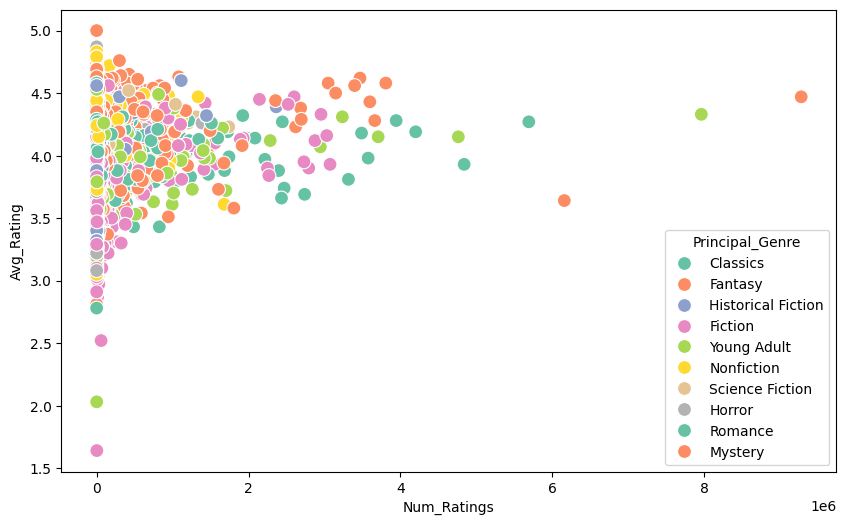

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtrado, x='Num_Ratings', y='Avg_Rating', hue='Principal_Genre', palette='Set2', s=100)

In [28]:
# 1. Creamos un gráfico que una los generos más leidos y la media de valoraciones.
df_agg = pd.DataFrame({
    'Avg_Rating': media_valoraciones,
    'Num_Ratings': cantidad_lecturas})

df_agg

,Avg_Rating,Num_Ratings
Principal_Genre,,
Classics,3.976531,129712984
Fantasy,4.133857,173531391
Fiction,3.939820,175578778
Historical Fiction,4.090577,43641973
Horror,3.941146,19843638
Mystery,3.989121,29246027
Nonfiction,4.068911,69348101
Romance,4.040222,37869952
Science Fiction,4.010062,29504390


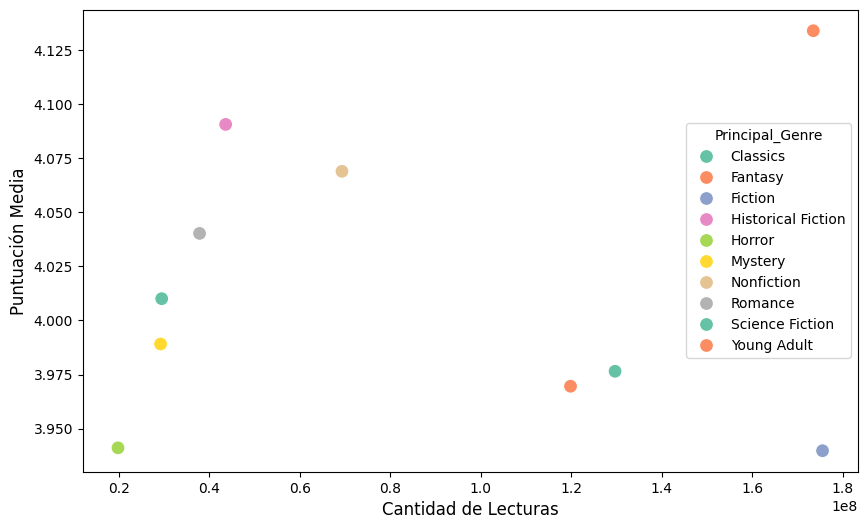

In [29]:
# 2. Creamos el diagrama de dispersión.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_agg, x='Num_Ratings', y='Avg_Rating', hue=df_agg.index, palette='Set2', s=100)
plt.xlabel('Cantidad de Lecturas', fontsize=12)
plt.ylabel('Puntuación Media', fontsize=12);

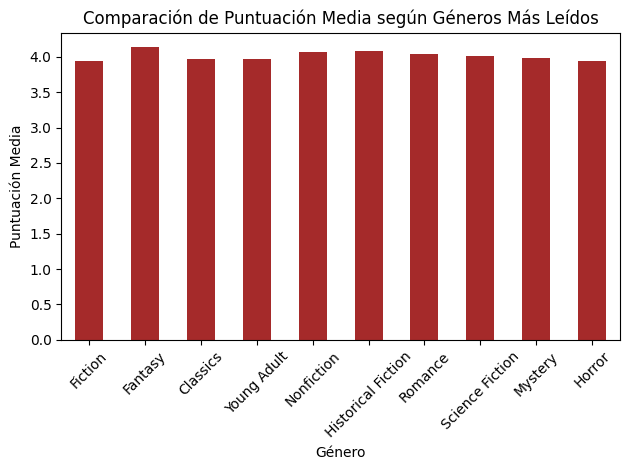

In [30]:
df_agg = df_agg.reset_index()
df_agg.sort_values('Num_Ratings', ascending=False).plot(kind='bar', x='Principal_Genre', y='Avg_Rating', legend=False, color='brown')
plt.title('Comparación de Puntuación Media según Géneros Más Leídos')
plt.xlabel('Género')
plt.ylabel('Puntuación Media')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Observamos que géneros como 'Horror' son menos leídos y también peor puntuados al contrario que 'Fantasy' que es el género más leído y también el mejor puntuado

### Además encontramos dos claros grupos, los que son leidos por mas de 100 millones de personas y los que no,
#### En el primer grupo destaca el género 'Horror' como el peor puntuado y el menos leído. Por otro lado, 'Historical Fiction' y Nonfiction' son los más leídos y los mejores puntuados.

### En el segundo grupo destaca 'Fantasy como el género más leído y mejor puntuado'.
#### En este grupo encontramos que excepto el género anterior se puntuan mucho peor, tal y como sucede con'Fiction' que es el más leído de todos y el peor puntuado.

Podemos mirar relaciones entre autores y mejores puntuaciones o que autores tienen mas publicaciones